#### **Importing Necessary Libraries**

In [712]:
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from cspa import clustering_ensemble

#### **Loading the Dataset**

In [713]:
df = pd.read_csv('Dataset/lung_cancer_examples.csv')

In [714]:
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [715]:
df.shape

(59, 7)

In [716]:
X = df.drop(['Name', 'Surname', 'Result'], axis=1)
X.head()

,Age,Smokes,AreaQ,Alkhol
0,35,3,5,4
1,27,20,2,5
2,30,0,5,2
3,28,0,8,1
4,68,4,5,6


#### **Scaling the Dataset**

In [717]:
scaler = MinMaxScaler()

In [718]:
X_scaled = scaler.fit_transform(X)

In [719]:
data = pd.DataFrame(X_scaled, columns = X.columns)

#### **Applying K-means**

In [720]:
total_shape = X_scaled.shape
total_col = total_shape[-1]
total_col

4

In [721]:
true_label = df.Result.unique()
cluster_number = true_label.size
cluster_number

2

In [722]:
output = []
for i in range(10):
    r = random.randint(1, total_col)
    list1 = []
    for j in range(r):
        list1.append(random.randint(0, total_col-1))
    list2 = []
    [list2.append(x) for x in list1 if x not in list2]
    random_col = data.iloc[:, list2].values

    kmeans = KMeans(n_clusters = cluster_number, random_state =0).fit(random_col)
    partitionings = (kmeans.labels_)
    output.append(partitionings)

output_matrix = np.array(output, dtype = int)    

#### **Cluster with Highest Rand Score**

In [723]:
rand_matrix = []
for i in range(10):
    f = []
    for j in range(10):
        rand_score = adjusted_rand_score(output_matrix[i] ,output_matrix[j])
        f.append(rand_score)
    rand_matrix.append(f)
                    
arr_rand = np.array(rand_matrix)
arr_rand = np.sum(arr_rand , axis = 0)
print(arr_rand)

max_rand = np.argmax(arr_rand)
print("the referance label is : " , max_rand)

[4.88876054 5.74347947 5.4770246  5.3870021  5.41398526 4.88876054
 2.614536   5.4770246  5.41398526 2.614536  ]
the referance label is :  1


In [724]:
ref_solution = output_matrix[max_rand]
ref_solution

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1])

#### **Relabeling Clusters**

In [725]:
def most_frequent(List):
    counter = 0
    num = List[0]

    for i in List:
        curr_frequency = List.count(i)
        if(curr_frequency> counter):
            counter = curr_frequency
            num = i
 
    return num

In [726]:
relabeled_list = []

for solution in output_matrix:
    zeros = [index for index, values in np.ndenumerate(solution) if values == 0]
    ones = [index for index, values in np.ndenumerate(solution) if values == 1]

    r_zeros = [values for index, values in np.ndenumerate(ref_solution) if index in zeros]
    r_ones = [values for index, values in np.ndenumerate(ref_solution) if index in ones]

    zero_label = most_frequent(r_zeros)
    one_label = most_frequent(r_ones)

    new_solution = solution.copy()
    new_solution[solution == zero_label] = 0
    new_solution[solution == one_label] = 1

    relabeled_list.append(new_solution)

In [727]:
relabeled_matrix = np.array(relabeled_list)
relabeled_matrix

array([[1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
        1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
        1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0],
       [1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
        1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1],
       [1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
        1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
        1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1],
       [0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
        1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 

#### **Majority Voting Result**

In [728]:
voting_list = []
for i in range(len(relabeled_matrix[0])):
    max_count= np.bincount(relabeled_matrix[:, i]).argmax()
    voting_list.append(max_count) 

In [729]:
voting_array = np.array(voting_list, dtype = int)
voting_array

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0])

#### **Threshold Voting Result**

In [730]:
threshold_voting_list = []
for i in range(len(relabeled_matrix[0])):
    max_count= np.bincount(relabeled_matrix[:, i])
    if max_count.max() >= 7:
        threshold_voting_list.append(max_count.argmax()) 
    else:
        threshold_voting_list.append(-1)

In [731]:
np.array(threshold_voting_list)

array([ 1, -1,  1,  1,  0,  1, -1,  1,  1,  0,  1,  1,  1, -1, -1,  1, -1,
        1,  0,  0,  0,  1,  1,  1,  0,  1,  1,  1,  0, -1,  1,  0,  0,  0,
        1,  1,  0,  0,  1,  1,  0,  1,  0,  0,  1,  1,  1,  1,  0,  0,  1,
        0, -1,  1,  1,  0,  0,  0, -1], dtype=int64)

In [732]:
data_array = np.array(data)

#### **Train Test Split**

In [733]:
X_train = [att for att,label in zip(data_array, threshold_voting_list) if label >= 0]
X_test = [att for att,label in zip(data_array, threshold_voting_list) if label == -1]
y_train = [label for label in threshold_voting_list if label >= 0]

In [734]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)

#### **Model Fitting**

In [735]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [736]:
classified_label = model.predict(X_test)

In [737]:
for i in range(len(threshold_voting_list)):
    count = 0
    if threshold_voting_list[i] == -1:
        threshold_voting_list[i] = classified_label[count]
        count += 1 
np.array(threshold_voting_list)

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

#### **Silhouette Score**

In [738]:
silhouette_avg = silhouette_score(data, voting_list)
print("The silhouette score of the dataset is:", silhouette_avg)
silhouette_thresh = silhouette_score(data, threshold_voting_list)
print("The silhouette score of the dataset is:", silhouette_avg)

The silhouette score of the dataset is: 0.39945590830239874
The silhouette score of the dataset is: 0.39945590830239874


#### **Applying CSPA**

In [739]:
ensemble_preds = clustering_ensemble(clusters_list=output_matrix, weights = None, threshold=0.7, cls_num_min=cluster_number)
np.array(ensemble_preds)

12


100%|██████████| 12/12 [00:00<?, ?it/s]

number of clusters reaches cls_num_min: 2  break.


array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1])

#### **Visualization**

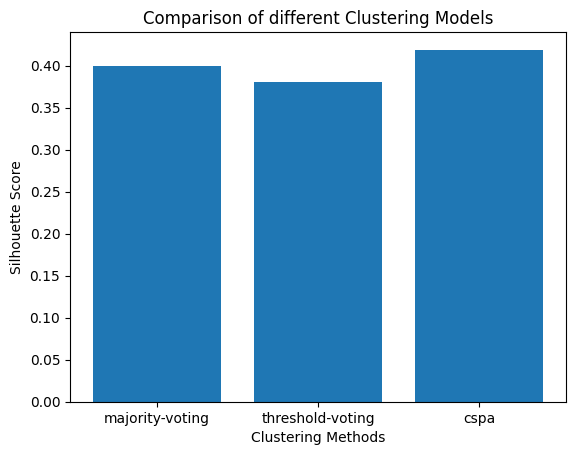

Silhouette Scores: [0.39945590830239874, 0.3807859185801084, 0.4188465961234816]


In [740]:
voting = ['majority-voting', 'threshold-voting', 'cspa'] 
  
# List of Silhouette Scores 
s_scores = [] 
  
# Evaluating the performance 
s_scores.append(silhouette_score(data, voting_array)) 
s_scores.append(silhouette_score(data, threshold_voting_list))
s_scores.append(silhouette_score(data, ensemble_preds)) 
# s_scores.append(silhouette_score(data, labels_nn))  
  
# Plotting a Bar Graph to compare the models 
plt.bar(voting, s_scores) 
plt.xlabel('Clustering Methods') 
plt.ylabel('Silhouette Score') 
plt.title('Comparison of different Clustering Models') 
plt.show() 

print(f'Silhouette Scores: {s_scores}')

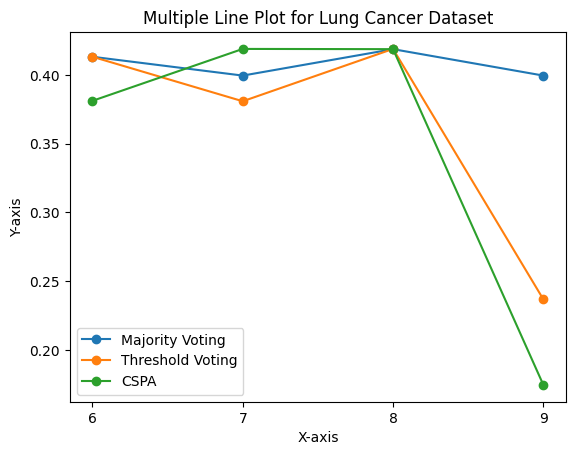

In [742]:
import matplotlib.pyplot as plt

# Sample data
x = [6, 7, 8, 9]
y1 = [0.4131417386780802, 0.39945590830239874, 0.41867365842641563, 0.39945590830239874]
y2 = [0.4131417386780802, 0.3807859185801084, 0.4188465961234816, 0.23673226849946374]
y3 = [0.3810978329681715, 0.4188465961234816, 0.41867365842641563, 0.17450148162852877]

# Create a multiple line plot
plt.plot(x, y1, marker='o', label='Majority Voting')
plt.plot(x, y2, marker='o', label='Threshold Voting')
plt.plot(x, y3, marker='o', label='CSPA')

# Set x-axis ticks to integer values
plt.xticks([6, 7, 8, 9])

# Add titles and labels
plt.title('Multiple Line Plot for Lung Cancer Dataset')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Add a legend
plt.legend()

# Show the plot
plt.show()
